In [222]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Keras modules
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense

In [2]:
pd.options.display.max_columns = None

In [199]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

In [3]:
%matplotlib inline

# Project Description
The following work is an attempt to predict credit default for 30000 costumers of a bank in Taiwan. The data is courtesy of UCI machine learning data-base and can be found [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients). 

My short-term goal is to employ an Artificial Neural Network (ANN) to make predictions about the probability of credit default using the available variables. This is an ongoing effort, so please check back for more updates.  

Reading the data in!

In [224]:
df = pd.read_csv("data.csv")

In [225]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Data Description

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

+ X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

+ X2: Gender (1 = male; 2 = female). 

+ X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

+ X4: Marital status (1 = married; 2 = single; 3 = others). 

+ X5: Age (year). 

+ X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

+ X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

+ X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

In [226]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Missing Values

As suggested by François Chollet (creator of Keras) in his [book](https://www.manning.com/books/deep-learning-with-python), one way to handle missing values is to replace them with zero:

+ In general, with neural networks, it’s safe to input missing values as 0, with the condition that 0 isn’t already a meaningful value. The network will learn from exposure to the data that the value 0 means missing data and will start ignoring the value. Note that if you’re expecting missing values in the test data, but the network was trained on data without any missing values, the network won’t have learned to ignore missing values! In this situation, you should artificially generate training samples with missing entries: copy some training samples several times, and drop some of the features that you expect are likely to be missing in the test data.

In the above dataset, we have many categories that have zeros as for their values (e.g., MARRIAGE which some entries are 0).

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

Fortunately, we don't have any "**string**" variable and therefore, we would not need to encode them. That said, we would still need to clean up of the variables. Looking at the marriage category, we can notice that we have a set of rows with 0's. 

In [228]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [229]:
sub_df = df[['SEX', 'EDUCATION', 'MARRIAGE', 'default payment next month']]
sub_df.apply(pd.Series.value_counts)

,SEX,EDUCATION,MARRIAGE,default payment next month
0,NaN,14,54.0,23364.0
1,11888.0,10585,13659.0,6636.0
2,18112.0,14030,15964.0,NaN
3,NaN,4917,323.0,NaN
4,NaN,123,NaN,NaN
5,NaN,280,NaN,NaN
6,NaN,51,NaN,NaN


Lets see how many of these 0's we have!

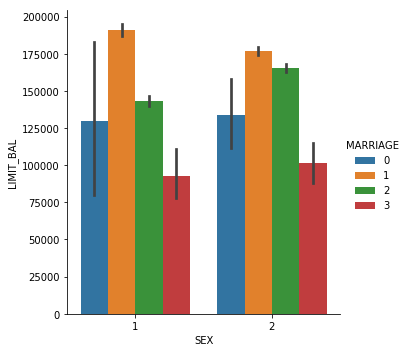

In [230]:
sns.catplot(x="SEX", y="LIMIT_BAL", kind="bar", data=df, hue='MARRIAGE')

In [231]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

It appears that we have 54 data entries that have 0 as for their marriage status!

+ X4: Marital status (1 = married; 2 = single; 3 = others).

I can just change them to the "**other**" category. 

In [232]:
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)

In [233]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

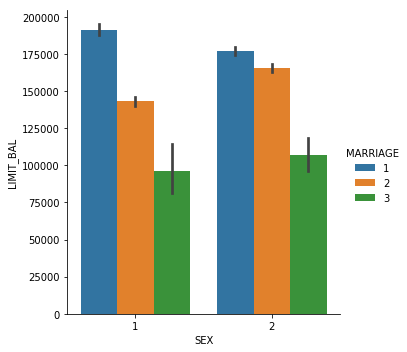

In [234]:
sns.catplot(x='SEX', y='LIMIT_BAL', data=df, hue='MARRIAGE', kind='bar')

It appears that married couples have a higher credit-line! This makes sense, since they have added (supplementary) credit. Now, lets check for other variables and make sure that they don't have any other "NaN" values. 

It appears that the **EDUCATION** variable is also having some values that don't follow the above definitions. 

+ X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

Compared to the rest of the data, there is not a lot of them. Since we have a **other** category here, we might be able to just convert them to that category!

In [235]:
df['EDUCATION'] = df['EDUCATION'].replace([0,5,6],4)

Lets take another look!

In [236]:
sub_df = df[['SEX', 'EDUCATION', 'MARRIAGE', 'default payment next month']]
sub_df.apply(pd.Series.value_counts)

,SEX,EDUCATION,MARRIAGE,default payment next month
0,NaN,NaN,NaN,23364.0
1,11888.0,10585.0,13659.0,6636.0
2,18112.0,14030.0,15964.0,NaN
3,NaN,4917.0,377.0,NaN
4,NaN,468.0,NaN,NaN


Looks like the rest of the columns don't have any value that is not out of range. Let's look at a few variable and their relationship with out response variable. Lastly, we would remove the ID column as it is not going to help with our analysis.

In [237]:
df.drop(labels='ID', axis=1, inplace=True)
df.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


## Onehot encoder
We would need to turn each of our categorical variables into multiple on-hot variable. These categorical variables are:

+ X2: Gender (1 = male; 2 = female).

+ X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

+ X4: Marital status (1 = married; 2 = single; 3 = others).

Before doing that, we would need to check out if all other columns are having the correct limits:

In [238]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

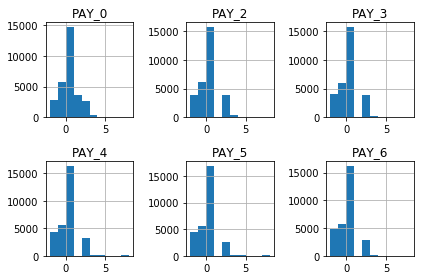

In [239]:
pays = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(pays, pays.columns, 2, 3, 10)

In [240]:
for col in df:
    print(df[col].unique())

[  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
[2 1]
[2 1 3 4]
[1 2 3]
[24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
[ 2 -1  0 -2  1  3  4  8  7  5  6]
[ 2  0 -1 -2  3  5  7  4  1  6  8]
[-1  0  2 -2  3  4  6  7  1  5  8]
[-1  0 -2  2  3  4  5  7  6  1  8]
[-2  0

It looks good, except for the pay columns. They have a -1 which is for "pay_duly". Then what would -2 encodes? I would change the -1, and -2 to be 0's as well. 

In [241]:
df['PAY_0'].replace([-1,-2], 0, inplace=True)
df['PAY_2'].replace([-1,-2], 0, inplace=True)
df['PAY_3'].replace([-1,-2], 0, inplace=True)
df['PAY_4'].replace([-1,-2], 0, inplace=True)
df['PAY_5'].replace([-1,-2], 0, inplace=True)
df['PAY_6'].replace([-1,-2], 0, inplace=True)

In [242]:
# One more test:
for col in df:
    print(df[col].unique())

[  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
[2 1]
[2 1 3 4]
[1 2 3]
[24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
[2 0 1 3 4 8 7 5 6]
[2 0 3 5 7 4 1 6 8]
[0 2 3 4 6 7 1 5 8]
[0 2 3 4 5 7 6 1 8]
[0 2 3 5 4 7 8 6]
[0 2 3 6 4 7 8 5]
[ 3913  2682 29239 ...  1683 -

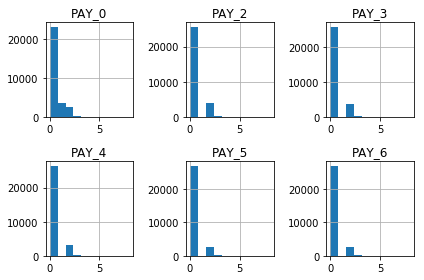

In [243]:
pays = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(pays, pays.columns, 2, 3, 10)

It appears that everything is in good shape. Now, we would need to change the Pandas DataFrame into arrays.

In [244]:
ds = df.values
type(ds)

numpy.ndarray

In [245]:
ds

array([[ 20000,      2,      2, ...,      0,      0,      1],
       [120000,      2,      2, ...,      0,   2000,      1],
       [ 90000,      2,      2, ...,   1000,   5000,      0],
       ...,
       [ 30000,      1,      2, ...,   2000,   3100,      1],
       [ 80000,      1,      3, ...,  52964,   1804,      1],
       [ 50000,      1,      2, ...,   1000,   1000,      1]])

In [246]:
onehotencoder = OneHotEncoder(categorical_features = [1,2,3, 5,6,7,8,9,10])

In [247]:
ds = onehotencoder.fit_transform(df).toarray()

In [248]:
ds = pd.DataFrame(ds)
ds.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20000.0,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,120000.0,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90000.0,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0,37.0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500000.0,29.0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
7,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000.0,23.0,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
8,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140000.0,28.0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0
9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20000.0,35.0,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.0


You can notice that the three variables are now converted to 12 variable. For instance the gender column is not two columns. To avoid the dummy variable trap, we would need to remove one category per old column (remove total of 3 columns). The index value of these columns are: 1, 2, and 6 (which correspond with the same columns heading). 

In [249]:
ds.drop([0,2,6,9,18,27,36,45,53], axis=1, inplace=True)
ds.head(5)

,1,3,4,5,7,8,10,11,12,13,14,15,16,17,19,20,21,22,23,24,25,26,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,46,47,48,49,50,51,52,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20000.0,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,120000.0,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90000.0,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50000.0,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [250]:
ds.shape

(30000, 67)

Split the dataset to Predictor and Response variables. 

In [176]:
# Random # generator so we get the same results
seed = 7

So, before we go on with the NN model, we would need to convert the Panda's dataframe to a Numpy array.

In [179]:
# Convert it into numpy array
cd = ds.values

In [182]:
# Now, lets separate the predictors (X), from the response (Y) variable.
X = cd[:,:66].astype(float)
y = cd[:,66]

In [183]:
print(X)
print(y)

[[1.0000e+00 1.0000e+00 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 1.0000e+00 0.0000e+00 ... 1.0000e+03 0.0000e+00 2.0000e+03]
 [1.0000e+00 1.0000e+00 0.0000e+00 ... 1.0000e+03 1.0000e+03 5.0000e+03]
 ...
 [0.0000e+00 1.0000e+00 0.0000e+00 ... 4.2000e+03 2.0000e+03 3.1000e+03]
 [0.0000e+00 0.0000e+00 1.0000e+00 ... 1.9260e+03 5.2964e+04 1.8040e+03]
 [0.0000e+00 1.0000e+00 0.0000e+00 ... 1.0000e+03 1.0000e+03 1.0000e+03]]
[1. 1. 0. ... 1. 1. 1.]


Our dataset is ready for on last pre-processing step; **Standardization**.

## Model Construction and Standardization

As we can notice here, the data has various ranges and also not normal. As mentioned by Jason Brownlee [here](https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/):  

+ "Neural network models are especially suitable to having consistent input values, both in scale and distribution."

We can use scikit-learn to **standardize** these variables. 

In [184]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [187]:
# Construct Model Topology
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(26, input_dim=66, kernel_initializer='normal', activation='relu'))
    model.add(Dense(13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [188]:
# Take a look at the model performance without any tuning
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=500, verbose=2)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/10
 - 4s - loss: 0.6690 - acc: 0.7690
Epoch 2/10
 - 0s - loss: 0.5167 - acc: 0.8045
Epoch 3/10
 - 0s - loss: 0.4482 - acc: 0.8129
Epoch 4/10
 - 0s - loss: 0.4396 - acc: 0.8182
Epoch 5/10
 - 0s - loss: 0.4366 - acc: 0.8198
Epoch 6/10
 - 0s - loss: 0.4351 - acc: 0.8201
Epoch 7/10
 - 0s - loss: 0.4339 - acc: 0.8207
Epoch 8/10
 - 0s - loss: 0.4333 - acc: 0.8205
Epoch 9/10
 - 0s - loss: 0.4326 - acc: 0.8204
Epoch 10/10
 - 0s - loss: 0.4321 - acc: 0.8204
Epoch 1/10
 - 4s - loss: 0.6601 - acc: 0.7726
Epoch 2/10
 - 0s - loss: 0.4969 - acc: 0.8073
Epoch 3/10
 - 0s - loss: 0.4469 - acc: 0.8145
Epoch 4/10
 - 0s - loss: 0.4388 - acc: 0.8195
Epoch 5/10
 - 0s - loss: 0.4349 - acc: 0.8200
Epoch 6/10
 - 0s - loss: 0.4326 - acc: 0.8204
Epoch 7/10
 - 0s - loss: 0.4316 - acc: 0.8213
Epoch 8/10
 - 0s - loss: 0.4305 - acc: 0.8218
Epoch 9/10
 - 0s - loss: 0.4298 - acc: 0.8226
Epoch 10/10
 - 0s - loss: 0.4293 - acc: 0.8223
Epoch 1/10
 - 4s - loss: 0.6645 - acc: 0.7704
Epoch 2/10
 - 0s - loss: 0.5125 

Find Tuning the model and preceptrons. 

In [189]:
# Construct Model Topology
def baseline_model2():
    # create model
    model = Sequential()
    model.add(Dense(66, input_dim=66, kernel_initializer='normal', activation='relu'))
    model.add(Dense(33, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [190]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=baseline_model2, epochs=10, batch_size=1000, verbose=2)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/10
 - 5s - loss: 0.6523 - acc: 0.7660
Epoch 2/10
 - 0s - loss: 0.5066 - acc: 0.7992
Epoch 3/10
 - 0s - loss: 0.4544 - acc: 0.8093
Epoch 4/10
 - 0s - loss: 0.4437 - acc: 0.8145
Epoch 5/10
 - 0s - loss: 0.4383 - acc: 0.8189
Epoch 6/10
 - 0s - loss: 0.4354 - acc: 0.8202
Epoch 7/10
 - 0s - loss: 0.4336 - acc: 0.8213
Epoch 8/10
 - 0s - loss: 0.4321 - acc: 0.8217
Epoch 9/10
 - 0s - loss: 0.4311 - acc: 0.8217
Epoch 10/10
 - 0s - loss: 0.4303 - acc: 0.8216
Epoch 1/10
 - 6s - loss: 0.6388 - acc: 0.7784
Epoch 2/10
 - 0s - loss: 0.4929 - acc: 0.7856
Epoch 3/10
 - 0s - loss: 0.4543 - acc: 0.8080
Epoch 4/10
 - 0s - loss: 0.4432 - acc: 0.8139
Epoch 5/10
 - 0s - loss: 0.4374 - acc: 0.8197
Epoch 6/10
 - 0s - loss: 0.4338 - acc: 0.8211
Epoch 7/10
 - 0s - loss: 0.4321 - acc: 0.8213
Epoch 8/10
 - 0s - loss: 0.4306 - acc: 0.8220
Epoch 9/10
 - 0s - loss: 0.4295 - acc: 0.8226
Epoch 10/10
 - 0s - loss: 0.4290 - acc: 0.8230
Epoch 1/10
 - 6s - loss: 0.6667 - acc: 0.7339
Epoch 2/10
 - 0s - loss: 0.5337 

Testing removeing the hidden layers

In [191]:
# Construct Model Topology
def baseline_model2():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=66, kernel_initializer='normal', activation='relu'))
    #model.add(Dense(26, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=baseline_model2, epochs=10, batch_size=1000, verbose=2)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Epoch 1/10
 - 7s - loss: 0.6738 - acc: 0.7572
Epoch 2/10
 - 0s - loss: 0.6265 - acc: 0.7964
Epoch 3/10
 - 0s - loss: 0.5683 - acc: 0.8015
Epoch 4/10
 - 0s - loss: 0.5148 - acc: 0.8061
Epoch 5/10
 - 0s - loss: 0.4798 - acc: 0.8085
Epoch 6/10
 - 0s - loss: 0.4627 - acc: 0.8095
Epoch 7/10
 - 0s - loss: 0.4543 - acc: 0.8104
Epoch 8/10
 - 0s - loss: 0.4497 - acc: 0.8122
Epoch 9/10
 - 0s - loss: 0.4463 - acc: 0.8135
Epoch 10/10
 - 0s - loss: 0.4440 - acc: 0.8161
Epoch 1/10
 - 7s - loss: 0.6897 - acc: 0.5686
Epoch 2/10
 - 0s - loss: 0.6619 - acc: 0.7971
Epoch 3/10
 - 0s - loss: 0.6242 - acc: 0.8054
Epoch 4/10
 - 0s - loss: 0.5760 - acc: 0.8091
Epoch 5/10
 - 0s - loss: 0.5256 - acc: 0.8116
Epoch 6/10
 - 0s - loss: 0.4845 - acc: 0.8128
Epoch 7/10
 - 0s - loss: 0.4609 - acc: 0.8147
Epoch 8/10
 - 0s - loss: 0.4501 - acc: 0.8161
Epoch 9/10
 - 0s - loss: 0.4455 - acc: 0.8159
Epoch 10/10
 - 0s - loss: 0.4431 - acc: 0.8170
Epoch 1/10
 - 8s - loss: 0.6810 - acc: 0.7434
Epoch 2/10
 - 0s - loss: 0.6467 

## Modeling results:

Our accuracy results range between 80.5-81.5%. This is not a bad start for a "roughly" tuned model. 

#### Near future goals
I will explore "**feature importance**" and "**feature engineering**" in the near future to come up with predictor variables that can explain the variability in this dataset. Please make sure to check back. If you are interested in my work, please contact me at: [foad.yousef@gmail.com](mailto:foad.yousef@gmail.com)